<a href="https://colab.research.google.com/github/nTrouvain/Timeseries-Sequence-Processing-2021/blob/main/TD2_Hidden_Markov_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD2: Hidden Markov Models

*Some vocabulary*

- **Hidden Markov Models (HMM)**: Modèle de Markov Cachée (MCC)
- **Growth Domestic Product (GDP)**: Produit Intérieur Brut (PIB)

In [2]:
!pip install hmmlearn
!pip install wbdata

     |████████████████████████████████| 374 kB 8.5 MB/s 


In [5]:
import numpy as np
import pandas as pd
import wbdata
import matplotlib.pyplot as plt

In machine learning, many internal states are hard to determine or observe. An alternative is to determine them from observable external factors. 

### **Markov Process / Markov chains**

A first order markov process is a stochastic process in which the future state depends on the current state only. 

The probability of the transition from one state to the next can be represented using a transition matrix, also called the markov matrix. 

However, in a lot of real world problems, the states of a system may not be fully observable, but we can still get insights about this internal state through the observables.  

### **Hidden Markov Model (HMM)**

HMM models a process with a markov property, ie two major assumptions are made : the next state and current observation depend on the current state only.

*   It includes the **initial state distribution** $\pi$ (the probability distribution of the initial state)
*   **Transition probabilites A** A matrix where each $a_{ij}$ represents the probability of moving from state i to state j. The transition matrix is used to show the hidden state to hidden state transition probabilities
*   **Emission probabilities B** the probability of an observation $o_i$ being generated from a state *i*. The emission probability is used to define the hidden variable in terms of its next hidden state. It represents the conditional distribution over an observable output for each hidden state at time t=0.
*   One or more hidden states
* A sequence of observations


$
P(x_i | x_1, x_2,..., x_{i-1}) = P(x_i|x_{i-1}) 
$       (**Markov Process**)

$
O(o_i | x_1, x_2,..., x_{i-1}) = P(o_i|x_i) 
$ (**Output Independence**)

> A + B = *HMM model $\lambda$*


#### **Example** :

Predicting whether someone will be walking, shopping or cleaning on a particular day depending upon whether it is sunny or rainy.

![alt text](https://vitalflux.com/wp-content/uploads/2021/09/hidden-markov-model-.png)



```
states = ('Rainy', 'Sunny')

observations = ('walk', 'shop', 'clean')

start_probability = {'Rainy' : 0.6, 'Sunny' : 0.4}

transition_probability = {
  'Rainy' : {'Rainy':0.7, 'Sunny':0.3},
  'Sunny' : {'Rainy':0.4, 'Sunny':0.6}
  }

emmision_probability = {
  'Rainy' : {'walk':0.1, 'shop':0.4, 'clean':0.5},
  'Sunny' : {'walk':0.6, 'shop':0.1, 'clean':0.3}
  }

```



#### **Fitting and decoding HMM**

There are three fundamental problems for HMMs:

* Given the model parameters and observed data, estimate the optimal sequence of hidden states : **Viterbi algorithm**

* Given the model parameters and observed data, calculate the model likelihood : **Forward-backword algorithm**

* Given just the observed data, estimate the model parameters : **Baum-Welch algorithm**

##### Applying HMM to forecast GDP states

In this example, we will investigate the hidden patterns in the world GDP growth (as an annual percentage), whether decreasing or increasing. We will then apply this model to forecast decreasing and increasing world GDP growth for a specific year. 



In [ ]:
# loading GDP growth data
country  = ["WLD"]
indicators = {"NY.GDP.MKTP.KD.ZG":"gdp_growth"}
df = wbdata.get_dataframe(indicators, country=country, convert_date=True)
df["gdp_growth"] = df["gdp_growth"].fillna(df["gdp_growth"].mean())
df.head()

,gdp_growth
date,
2020-01-01,-3.404753
2019-01-01,2.561760
2018-01-01,3.241819
2017-01-01,3.386968
2016-01-01,2.803578


###### Just some statistics

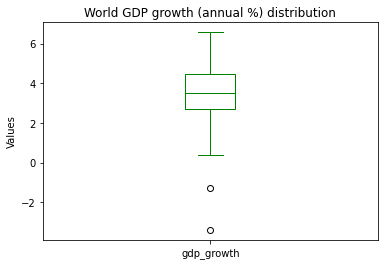

In [ ]:
# Plot the distribution of the world’s GDP growth data (maybe a boxplot would
# be interesting)

...

plt.title("World GDP growth (annual %) distribution")
plt.ylabel("Values")
plt.show()

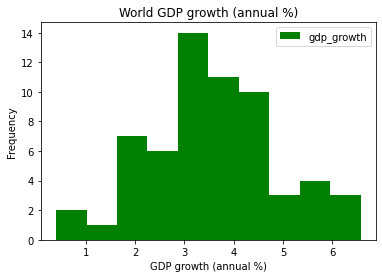

In [ ]:
# We can see that the data is normally distributed but there are outliers on the negative axis,
# let's remove them

# Tips: see numpy.where, and replace outliers with the mean.

df['gdp_growth'] = ...

# Outlier Removal
df.plot(kind="hist", color="green")
plt.title("World GDP growth (annual %)")
plt.xlabel("GDP growth (annual %)")
plt.show()

# the plot below confirms the normal distribution

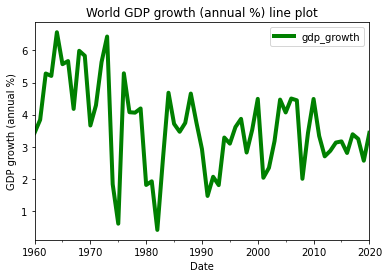

In [ ]:
df.plot(color="green",lw=4)
plt.title("World GDP growth (annual %) line plot")
plt.xlabel("Date")
plt.ylabel("GDP growth (annual %)")
plt.show()

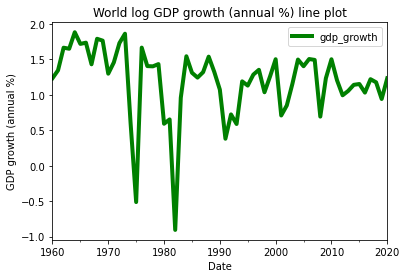

In [ ]:
log_df = np.log(df)
log_df = pd.DataFrame(log_df)
log_df.plot(color="green",lw=4)
plt.title("World log GDP growth (annual %) line plot")
plt.xlabel("Date")
plt.ylabel("GDP growth (annual %)")
plt.show()

###### Developing the gaussian HMM

In [ ]:
old_log_df = pd.DataFrame(log_df)
log_df = log_df.values
x = np.column_stack([log_df])
from hmmlearn import hmm

# make a GaussianHMM instance and fit.
model = ...
model.fit(x)

print("Transition probabilities")
print(...)

Transition probabilities
[[0.91007821 0.08992179]
 [0.38927124 0.61072876]]


In [ ]:
# predict the optimal sequence of internal hidden states
hidden_states = ...
hidden_states = pd.DataFrame(hidden_states, columns = ["hidden_states"])
hidden_states.index = old_log_df.index
hidden_states.head()

,hidden_states
date,
2020-01-01,0
2019-01-01,0
2018-01-01,0
2017-01-01,0
2016-01-01,0


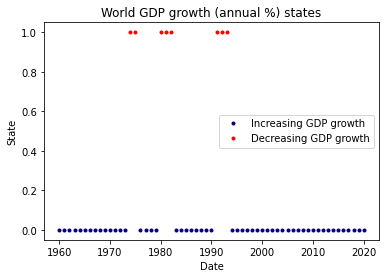

In [ ]:
# visuallizing hidden states graphically

increasing_gdp = hidden_states.loc[hidden_states.values == 0]
decreasing_gdp = hidden_states.loc[hidden_states.values == 1]
fig, ax = plt.subplots()
plt.plot(increasing_gdp.index,increasing_gdp.values,".",linestyle="none",color= "navy",label = "Increasing GDP growth")
plt.plot(decreasing_gdp.index, decreasing_gdp.values,".",linestyle="none",color = "red",label = "Decreasing GDP growth")
plt.title("World GDP growth (annual %) states")
plt.xlabel("Date")
plt.ylabel("State")
plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


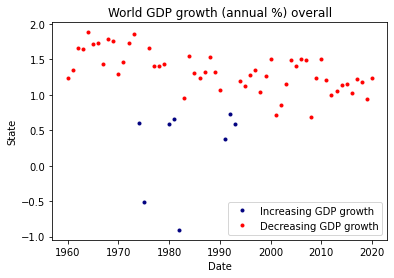

In [ ]:
# dispersion of hidden states

mk_data = old_log_df.join(hidden_states, how = "inner")
mk_data = mk_data[["gdp_growth","hidden_states"]]
up = pd.Series()
down = pd.Series()
mid = pd.Series()

for tpl in mk_data.itertuples():
    if tpl.hidden_states == 0:
        x = pd.Series(tpl.gdp_growth,index = [tpl.Index])
        up = up.append(x)
    else:
        x = pd.Series(tpl.gdp_growth,index = [tpl.Index])
        down = down.append(x)
        up = up.sort_index()
        down = down.sort_index()

fig, ax = plt.subplots()
plt.plot(up.index, up.values, ".", c = "navy",label = "Increasing GDP growth")
plt.plot(down.index, down.values,".",c = "red",label = "Decreasing GDP growth")
plt.title("World GDP growth (annual %) overall")
plt.xlabel("Date")
plt.ylabel("State")
plt.legend(loc="best")
plt.show()

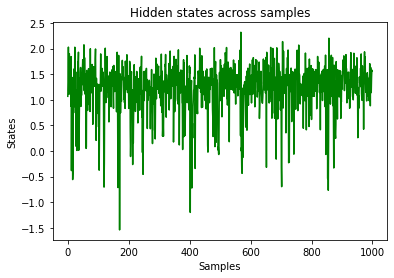

In [ ]:
# hidden states across randomly generated samples

num_sample = 1000
sample, _ = model.sample(num_sample)
plt.plot(np.arange(num_sample), sample[:,0],color="green")
plt.title("Hidden states across samples")
plt.xlabel("Samples")
plt.ylabel("States")
plt.show()

In [ ]:
# Investigating mean and variance for each state

for i in range(model.n_components):
    print("{} order hidden state".format(i))
    print("mean =", model.means_[i])
    print("var =", np.diag(model.covars_[i]))

0 order hidden state
mean = [1.34559009]
var = [0.07287614]
1 order hidden state
mean = [0.52080792]
var = [0.43221848]
